In [13]:
c_puct = 0.5
c_puct_str = f'{c_puct:.0e}' if c_puct < 1 else str(c_puct)

In [14]:
c_puct_str

'5e-01'

In [9]:
c_puct=0.5
n_res=3
f'/scratch/zz737/fiar/tournaments/tournament_8/checkpoints_mcts100_cpuct{c_puct:.0e}_id_res{n_res}-0/'

'/scratch/zz737/fiar/tournaments/tournament_8/checkpoints_mcts100_cpuct5e-01_id_res3-0/'

In [1]:
import pandas as pd
import sys,os,copy,pdb,importlib
sys.path.append('../classes')
sys.path.append('../analysis')
import numpy as np
np.set_printoptions(precision=3,suppress=True)
import matplotlib.pyplot as plt

import tournament_new as tn
import create_database as cd
importlib.reload(tn)

import beck.beck_game
importlib.reload(beck.beck_game)
from beck.beck_game import BeckGame as Game
from beck.beck_players import HumanBeckPlayer
import arena
importlib.reload(arena)
from arena import Arena

import mcts
from bfts import BFTS

import cog_related
importlib.reload(cog_related)
from cog_related import cog_value_net as cvn


importlib.reload(tn)
game = Game(4,9,4)
all_p = pd.read_pickle(cd.DATABASE_LOC)

from pickle import Pickler, Unpickler
import pickle

# res = tn.merge_res_to_base()
tournament_res = pd.read_pickle('/scratch/zz737/fiar/tournaments/ai_all_player_round_robin_base.pkl')

from utils import *
mctsargs = dotdict({
        'numMCTSSims': 100,
        'cpuct': 2,
        })
import supervised_learning as sl
from importlib import reload
reload(sl)

<module 'supervised_learning' from '../classes/supervised_learning.py'>

In [170]:
# checkpoint_dir = '/scratch/zz737/fiar/sl/resnet/res15_color_Ex_tournament_6_checkpoints_mcts100_cpuct2_id_1_checkpoint_55'
# file = 'final'
# checkpoint_dir = '/scratch/zz737/fiar/tournaments/tournament_9/checkpoints_mcts100_cpuct2_id_res9-0'
# file = 'checkpoint_22'

checkpoint_dir = '/scratch/zz737/fiar/sl/resnet/res15_color_Ex_tournament_8_checkpoints_mcts100_cpuct2_id_res3-0_checkpoint_61'
file = 'final'

args = pickle.load(open(os.path.join(checkpoint_dir,'args.p'),'rb'))
on_c = sl.OthelloNNet_resnet(game, args)
nnet_c = sl.NNetWrapper_color(game,nnet=on_c,args=args)
nnet_c.load_checkpoint(checkpoint_dir, file+'.pth.tar')

In [3]:
# import beck.beck_nnet_pvcorr as bnp
# checkpoint_dir = '/scratch/zz737/fiar/sl/resnet/res15_color_pvcorr_Ex_tournament_6_checkpoints_mcts100_cpuct2_id_1_checkpoint_55_reduce10'
# file = 'final'
# args = pickle.load(open(os.path.join(checkpoint_dir,'args.p'),'rb'))
# nnet_c_pvcorr_red10=bnp.NNetWrapper_pvcorr_color(game,args=args,nnet='default')
# # on_c = sl.OthelloNNet_resnet(game, args)
# # nnet_c = sl.NNetWrapper_color(game,nnet=on_c,args=args)
# nnet_c_pvcorr_red10.load_checkpoint(checkpoint_dir, file+'.pth.tar')

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/zz737/fiar/sl/resnet/res15_color_pvcorr_Ex_tournament_6_checkpoints_mcts100_cpuct2_id_1_checkpoint_55_reduce10/args.p'

In [24]:
import keras
import tensorflow as tf
import tensorflow.math as tfm
import keras.backend as K 
from keras.models import *
from keras.layers import *
from keras.optimizers import *


In [ ]:
tf.train.latest_checkpoint(checkpoint_dir)

In [29]:
nnet_pvcorr_red1=bnp.NNetWrapper_pvcorr(game,args=args,nnet='default')
nnet_pvcorr_red1.nnet.sub_model

In [32]:
nnet_pvcorr_red1.nnet.sub_model

In [34]:
help(tf.keras.callbacks.ModelCheckpoint)

Help on class ModelCheckpoint in module tensorflow.python.keras.callbacks:

class ModelCheckpoint(Callback)
 |  ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch', **kwargs)
 |  
 |  Callback to save the Keras model or model weights at some frequency.
 |  
 |  `ModelCheckpoint` callback is used in conjunction with training using
 |  `model.fit()` to save a model or weights (in a checkpoint file) at some
 |  interval, so the model or weights can be loaded later to continue the training
 |  from the state saved.
 |  
 |  A few options this callback provides include:
 |  
 |  - Whether to only keep the model that has achieved the "best performance" so
 |    far, or whether to save the model at the end of every epoch regardless of
 |    performance.
 |  - Definition of 'best'; which quantity to monitor and whether it should be
 |    maximized or minimized.
 |  - The frequency it should save at. Currently, t

In [37]:
import beck.beck_nnet_pvcorr as bnp
checkpoint_dir = '/scratch/zz737/fiar/sl/resnet/res3_pvcorr_Ex_tournament_6_checkpoints_mcts100_cpuct2_id_1_checkpoint_55_reduce1'
file = tf.train.latest_checkpoint(checkpoint_dir)
# file = 'checkpoint'
args = pickle.load(open(os.path.join(checkpoint_dir,'args.p'),'rb'))
onpv = bnp.OthelloNNet_with_PVcorr(game,args=args,sub_modeel='default')
onpv.compile(loss=['categorical_crossentropy','mean_squared_error',bnp.Scaled_MSE_with_mask(1)], optimizer=Adam(0.001))
nnet_pvcorr_red1=bnp.NNetWrapper_pvcorr(game,args=args,nnet=onpv)
# on_c = sl.OthelloNNet_resnet(game, args)
# nnet_c = sl.NNetWrapper_color(game,nnet=on_c,args=args)



nnet_pvcorr_red1.nnet.load_weights(os.path.join(checkpoint_dir, file)).expect_partial()

In [4]:
checkpoint_dir = '/scratch/zz737/fiar/tournaments/tournament_8/checkpoints_mcts100_cpuct2_id_res9-0'
file = 'checkpoint_57'
# args=sl.get_args(n_res=9, epochs=10, num_channels=256, kernel_size=3)
# pickle.dump(args,open(os.path.join(checkpoint_dir,'args.p'),'wb'))
args=pickle.load(open(os.path.join(checkpoint_dir,'args.p'),'rb'))
on9 = sl.OthelloNNet_resnet(game, sl.get_args(n_res=9, epochs=10, num_channels=256, kernel_size=3))
# nnet = sl.NNetWrapper_color(game,nnet=on,args=args)
nnet9 = sl.NNetWrapper(game,nnet=on9,args=args)
nnet9.load_checkpoint(checkpoint_dir, file+'.pth.tar')

checkpoint_dir = '/scratch/zz737/fiar/tournaments/tournament_8/checkpoints_mcts100_cpuct2_id_res9-0'
file = 'checkpoint_12'
on9_12 = sl.OthelloNNet_resnet(game, sl.get_args(n_res=9, epochs=10, num_channels=256, kernel_size=3))
# nnet = sl.NNetWrapper_color(game,nnet=on,args=args)
nnet9_12 = sl.NNetWrapper(game,nnet=on9_12,args=args)
nnet9_12.load_checkpoint(checkpoint_dir, file+'.pth.tar')


checkpoint_dir = '/scratch/zz737/fiar/tournaments/tournament_8/checkpoints_mcts100_cpuct2_id_res3-0'
file = 'checkpoint_43'
# args=sl.get_args(n_res=3, epochs=10, num_channels=256, kernel_size=3)
# pickle.dump(args,open(os.path.join(checkpoint_dir,'args.p'),'wb'))
args = pickle.load(open(os.path.join(checkpoint_dir,'args.p'),'rb'))
on3 = sl.OthelloNNet_resnet(game, args)
# nnet = sl.NNetWrapper_color(game,nnet=on,args=args)
nnet3 = sl.NNetWrapper(game,nnet=on3,args=args)
nnet3.load_checkpoint(checkpoint_dir, file+'.pth.tar')

checkpoint_dir = '/scratch/zz737/fiar/sl/resnet/res3_Ex_tournament_8_checkpoints_mcts100_cpuct2_id_res3-0_checkpoint_61'
file = 'final'
args = pickle.load(open(os.path.join(checkpoint_dir,'args.p'),'rb'))
on3_sl = sl.OthelloNNet_resnet(game, args)
nnet3_sl = sl.NNetWrapper(game,nnet=on3_sl,args=args)
nnet3_sl.load_checkpoint(checkpoint_dir, file+'.pth.tar')

checkpoint_dir = '/scratch/zz737/fiar/tournaments/tournament_10/checkpoints_mcts100_cpuct2_id_res9-0'
file = 'checkpoint_22'
args = pickle.load(open(os.path.join(checkpoint_dir,'args.p'),'rb'))
on9_val = sl.OthelloNNet_resnet(game, args)
# nnet = sl.NNetWrapper_color(game,nnet=on,args=args)
nnet9_val = sl.NNetWrapper(game,nnet=on9_val,args=args)
nnet9_val.load_checkpoint(checkpoint_dir, file+'.pth.tar')

checkpoint_dir = '/scratch/zz737/fiar/tournaments/tournament_10/checkpoints_mcts100_cpuct2_id_res3-0'
file = 'checkpoint_31'
args = pickle.load(open(os.path.join(checkpoint_dir,'args.p'),'rb'))
on3_val = sl.OthelloNNet_resnet(game, args)
# nnet = sl.NNetWrapper_color(game,nnet=on,args=args)
nnet3_val = sl.NNetWrapper(game,nnet=on3_val,args=args)
nnet3_val.load_checkpoint(checkpoint_dir, file+'.pth.tar')

w = [0.01,0.2,0.05,2,100]
C = 0.1
args = [w,C]
nnet3_cvn = cvn.NNetWrapper(game, nnet3, args)
nnet9_cvn = cvn.NNetWrapper(game, nnet9, args)

In [5]:
initboard = game.getInitBoard()
# initboard[1,3]=1
# initboard[2,4]=1
# initboard[2,5]=-1
# initboard[1,4]=-1
b_str='''0 |- - - - O - - - - |
1 |- - - - - X - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |'''
b_str='''0 |- - - - O - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - X - - - - |'''
b_str='''0 |- - X O O - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - X - - - - |'''
initboard = game.get_board_from_xo_str(b_str)
initboard=None

In [180]:

human_p = HumanBeckPlayer(game)
p_human = lambda x:human_p.play(x)

mctsargs.numMCTSSims=100
tree9 = mcts.MCTS(game,nnet9,copy.copy(mctsargs))
tree9_12 = mcts.MCTS(game,nnet9_12,copy.copy(mctsargs))
# tree9.args.numMCTSSims=200
tree3 = mcts.MCTS(game,nnet3,copy.copy(mctsargs))
tree3_copy = mcts.MCTS(game,nnet3,mctsargs)
tree_c = mcts.MCTS_color(game,nnet_c,mctsargs)
tree_c_copy = mcts.MCTS_color(game,nnet_c,mctsargs)
tree3_cvn = mcts.MCTS(game, nnet3_cvn, mctsargs)
tree9_cvn = mcts.MCTS(game, nnet9_cvn, mctsargs)
# tree_c_pvcorr_red10 = mcts.MCTS_color(game,nnet_c_pvcorr_red10,mctsargs)

tree3_sl = mcts.MCTS(game,nnet3_sl,mctsargs)

tree_pvcorr_red1 = mcts.MCTS(game, nnet_pvcorr_red1, mctsargs) 

mctsargsval = copy.copy(mctsargs)
mctsargsval.w_count = 0
tree9_val = mcts.MCTS(game,nnet9_val,mctsargsval)
tree3_val = mcts.MCTS(game,nnet3_val,mctsargsval)

bftsargs = dotdict({'numBFSsims':100,'PruningThresh':2})
tree3_bfts = BFTS(game,nnet3,bftsargs)
tree9_bfts = BFTS(game,nnet9,bftsargs)

ai9 = lambda x:np.random.choice(np.arange(game.getActionSize()),p=tree9.getActionProb(x, temp=1/10))
ai9_12 = lambda x:np.random.choice(np.arange(game.getActionSize()),p=tree9_12.getActionProb(x, temp=1/10))
ai3 = lambda x:np.random.choice(np.arange(game.getActionSize()),p=tree3.getActionProb(x, temp=1/10))
ai3_copy = lambda x:np.random.choice(np.arange(game.getActionSize()),p=tree3_copy.getActionProb(x, temp=1/10))
ai_c = lambda x:np.random.choice(np.arange(game.getActionSize()),p=tree_c.getActionProb(x, 0, temp=1/10))
ai_c_copy = lambda x:np.random.choice(np.arange(game.getActionSize()),p=tree_c.getActionProb(x, 1, temp=1/10))
ai3_cvn = lambda x:np.random.choice(np.arange(game.getActionSize()),p=tree3_cvn.getActionProb(x, temp=1/10))
ai9_cvn = lambda x:np.random.choice(np.arange(game.getActionSize()),p=tree9_cvn.getActionProb(x, temp=1/10))
# ai_c_pvcorr_red10 = lambda x:np.random.choice(np.arange(game.getActionSize()),p=tree_c_pvcorr_red10.getActionProb(x, 0, temp=1/10))

ai_pvcorr_red1 = lambda x:np.random.choice(np.arange(game.getActionSize()),p=tree_pvcorr_red1.getActionProb(x, temp=1/10))

ai3_sl = lambda x:np.random.choice(np.arange(game.getActionSize()),p=tree3_sl.getActionProb(x, temp=1/10))

ai3_bfts = lambda x:np.random.choice(np.arange(game.getActionSize()),p=tree3_bfts.getActionProb(x, temp=1/10))
ai9_bfts = lambda x:np.random.choice(np.arange(game.getActionSize()),p=tree9_bfts.getActionProb(x, temp=1/10))

ai9_val = lambda x:np.random.choice(np.arange(game.getActionSize()),p=tree9_val.getActionProb(x, temp=1/20))
ai3_val = lambda x:np.random.choice(np.arange(game.getActionSize()),p=tree3_val.getActionProb(x, temp=1/20))

# arena = Arena(ai9, ai3, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai3, ai9, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai3, ai_c, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai_c, ai3, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai_c, ai_c_copy, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai9, ai_c, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
arena = Arena(ai_c, ai9, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai9_12, ai_c, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai_c, ai9_12, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai3, p_human, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(p_human, ai_c, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai3, ai3_copy, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai3, ai3_cvn, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai3_cvn, ai3, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai9_cvn, ai9, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai9, ai9_cvn, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai9_cvn, ai3, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai3, ai9_cvn, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai3_cvn, ai9, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai9, ai3_cvn, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai9_bfts, ai9, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai9, ai9_bfts, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai9_val, ai_c, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai3_val, ai_c, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai_c, ai_c_pvcorr_red10, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai_c_pvcorr_red10, ai_c, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai3, ai3_sl, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai3_sl, ai3, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])

# arena = Arena(ai3, ai_pvcorr_red1, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
# arena = Arena(ai_pvcorr_red1,ai3, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])

arena.playGame(verbose=True,initboard=initboard)

Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - O - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - X - - - |
3 |- - - - O - - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - X - - - |
3 |- - - O O - - - - |
-----------------------
Turn  5 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - X - - - |
3 |- - - O O X - - - |
-----------------------
Turn  6 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - O - - - |
1 |- - - -

1

In [137]:
ai_c = lambda x,c:np.random.choice(np.arange(game.getActionSize()),p=tree_c.getActionProb(x, c, temp=1/10))
# arena = Arena(ai_c, ai9_12, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[True,False],flip_color=False)
arena = Arena(ai9_12,ai_c, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,True],flip_color=False)
arena.playGame(verbose=True,initboard=initboard)



Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - O - - - |
3 |- - - - - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - X - - - - |
1 |- - - - - - - - - |
2 |- - - - - O - - - |
3 |- - - - - - - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - X - - - - |
1 |- - - - - - - - - |
2 |- - - - - O O - - |
3 |- - - - - - - - - |
-----------------------
Turn  5 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - X - - - - |
1 |- - - - - - - - - |
2 |- - - - X O O - - |
3 |- - - - - - - - - |
-----------------------
Turn  6 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - X - - - - |
1 |- - - -

-1

In [110]:
b_str='''0 |- - - - O - - - - |
1 |- - - - X X - - - |
2 |- - - - O - - - - |
3 |- - - - - - - - - |'''
# initboard = game.get_board_from_xo_str(b_str)
initboard = game.getInitBoard()
tree3.refresh()
tree3_copy.refresh()
ai3 = lambda x:np.random.choice(np.arange(game.getActionSize()),p=tree3.getActionProb(x, temp=1/10))
ai3_copy = lambda x:np.random.choice(np.arange(game.getActionSize()),p=tree3_copy.getActionProb(x, temp=1/10))

arena = Arena(ai3, ai3_copy, game, display=game.display,tree1=tree9,tree2=tree3,track_color=[False,False])
arena.playGame(verbose=True,initboard=initboard)

Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - O - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - O - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - X - - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - O O - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - X - - - - |
-----------------------
Turn  5 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - X O O - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - X - - - - |
-----------------------
Turn  6 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - X O O - - - - |
1 |- - O -

0.0001

In [182]:
!python ../classes/main.py 1

2022-01-18 15:17:44.582762: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64:/.singularity.d/libs
2022-01-18 15:17:44.582791: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
['1']
2022-01-18 15:17:46 cs008.hpc.nyu.edu __main__[1821268] INFO Loading BeckGame...
2022-01-18 15:17:46 cs008.hpc.nyu.edu __main__[1821268] INFO Loading NNetWrapper...
2022-01-18 15:17:46 cs008.hpc.nyu.edu __main__[1821268] WARNING Not loading a checkpoint!
2022-01-18 15:17:46 cs008.hpc.nyu.edu __main__[1821268] INFO Loading the Coach...
2022-01-18 15:17:46 cs008.hpc.nyu.edu __main__[1821268] INFO Starting the learning process 🎉
2022-01-18 15:17:46 cs008.hpc.nyu.edu coach[1821268] INFO Starting Iter #1 ...
Self Play: 100%|██████████████████████████████████| 1/1

In [195]:
import main
reload(main)

<module 'main' from '../classes/main.py'>

In [196]:
main.args

{'numIters': 1000,
 'numEps': 100,
 'tempThreshold': 15,
 'updateThreshold': 0.51,
 'maxlenOfQueue': 200000,
 'numMCTSSims': 100,
 'arenaCompare': 30,
 'cpuct': 2,
 'checkpoint': '/scratch/zz737/fiar/tournaments/tournament_13/checkpoints_mcts100_cpuct2_id_res9-0/',
 'load_model': False,
 'load_folder_file': ('/scratch/zz737/fiar/tournaments/tournament_13/checkpoints_mcts100_cpuct2_id_res9-0/',
  'best.pth.tar'),
 'numItersForTrainExamplesHistory': 20,
 'loaded_iter': None,
 'w_count': 1,
 'flip_color': False,
 'dir_alpha': 0.03,
 'epsilon': 0.25}

In [199]:
args = main.args
if not os.path.exists(args.checkpoint):
    os.makedirs(args.checkpoint)
    

In [201]:
import coach_no_reject as cnr
reload(cnr)
c = cnr.Coach(game,nnet_c,main.args)

Checkpoint Directory exists! 


In [204]:
c.args.numEps=1

In [205]:
c.executeEpisode()

[(array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0]]),
  array([0.025, 0.015, 0.02 , 0.02 , 0.101, 0.01 , 0.02 , 0.01 , 0.01 ,
         0.01 , 0.01 , 0.01 , 0.025, 0.01 , 0.06 , 0.01 , 0.025, 0.01 ,
         0.04 , 0.01 , 0.015, 0.02 , 0.02 , 0.01 , 0.01 , 0.01 , 0.02 ,
         0.04 , 0.025, 0.02 , 0.01 , 0.01 , 0.151, 0.01 , 0.156, 0.02 ]),
  -1,
  1),
 (array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0]]),
  array([0.02 , 0.156, 0.01 , 0.151, 0.01 , 0.01 , 0.02 , 0.025, 0.04 ,
         0.02 , 0.01 , 0.01 , 0.01 , 0.02 , 0.02 , 0.015, 0.01 , 0.04 ,
         0.01 , 0.025, 0.01 , 0.06 , 0.01 , 0.025, 0.01 , 0.01 , 0.01 ,
         0.01 , 0.01 , 0.02 , 0.01 , 0.101, 0.02 , 0.02 , 0.015, 0.025]),
  -1,
  1),
 (array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0,

In [211]:
!python ../classes/main.py 1

2022-01-18 16:34:22.648857: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64:/.singularity.d/libs
2022-01-18 16:34:22.648889: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
['1']
2022-01-18 16:34:24 cs008.hpc.nyu.edu __main__[1841556] INFO Loading BeckGame...
2022-01-18 16:34:24 cs008.hpc.nyu.edu __main__[1841556] INFO Loading NNetWrapper...
2022-01-18 16:34:24 cs008.hpc.nyu.edu __main__[1841556] WARNING Not loading a checkpoint!
2022-01-18 16:34:24 cs008.hpc.nyu.edu __main__[1841556] INFO Loading the Coach...
Checkpoint Directory exists! 
2022-01-18 16:34:25 cs008.hpc.nyu.edu __main__[1841556] INFO Starting the learning process 🎉
2022-01-18 16:34:25 cs008.hpc.nyu.edu coach_no_reject[1841556] INFO Starting Iter #1 ...
Self Play: 100%

In [122]:
!python ../classes/supervised_learning_pvcorr.py 0

2022-01-17 15:04:46.643790: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64:/.singularity.d/libs
2022-01-17 15:04:46.643819: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
['0']
training res15_color_pvcorr...
Epoch 1/3
1/1 [==============================] - 0s 170ms/step - loss: 5.9224 - output_1_loss: 4.3652 - output_2_loss: 0.0213 - output_3_loss: 0.7557
Epoch 2/3
1/1 [==============================] - 0s 170ms/step - loss: 4.1933 - output_1_loss: 2.1972 - output_2_loss: 0.0135 - output_3_loss: 1.2007
Epoch 3/3
1/1 [==============================] - 0s 196ms/step - loss: 3.1823 - output_1_loss: 2.2523 - output_2_loss: 0.1430 - output_3_loss: 0.0024
Checkpoint Directory exists! 


In [52]:
!python ../classes/supervised_learning_pvcorr.py 0

2022-01-17 12:08:41.093193: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64:/.singularity.d/libs
2022-01-17 12:08:41.093220: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
['0']
training res15_color_pvcorr...
Epoch 1/80
 1/86 [..............................] - ETA: 0s - loss: 6.6392 - output_1_loss: 3.9599 - output_2_loss: 0.6906 - output_3_loss: 1.2083^C


# diagnostics

In [15]:
b_l = []
b_str ='''0 |- - - - O X - X - |
1 |- - X O O O X - - |
2 |X O O O X O O - - |
3 |- X O X X - - - - |'''
b = game.get_board_from_xo_str(b_str)
b=-b
b_l.append(b)

b_str = '''0 |- - - - X - - - - |
1 |- O X O O X - - - |
2 |- - - - X - - - - |
3 |- - - O - - - - - |
'''
b = game.get_board_from_xo_str(b_str)
b_l.append(b)

b_str='''0 |- - - - - X - - - |
1 |- - - - X O - - - |
2 |- - - X O O O X - |
3 |- - O X - - - - - |
'''
b = game.get_board_from_xo_str(b_str)
b_l.append(b)

b_str ='''0 |X - - - - - O - - |
1 |X - - - O O - - - |
2 |X - - - - - - - - |
3 |- - - - - - - - - |
'''
b = game.get_board_from_xo_str(b_str)
b_l.append(b)

b_str ='''0 |O - - - - - X - - |
1 |O - - - - X - - - |
2 |O - - O X - - - - |
3 |X - - O - - - - - |'''

b = game.get_board_from_xo_str(b_str)
b = -b
b_l.append(b)

b_str='''0 |- - - - X O X O X |
1 |- - - - X O O O X |
2 |- - X - - X O X - |
3 |- - - - - O O X O |'''
b = game.get_board_from_xo_str(b_str)
b_l.append(b)

b_str = '''0 |- - - O - - - - - |
1 |- - - O X - - - - |
2 |- - - - O X - - - |
3 |- - - - - - - - - |'''
b = game.get_board_from_xo_str(b_str)
b=-b
b_l.append(b)

b_str='''0 |- - - - O - O - - |
1 |- - - X O O O X - |
2 |- - - - O X O - - |
3 |- O X X X O X X - |'''
b = game.get_board_from_xo_str(b_str)
b=-b
b_l.append(b)

b_str = '''0 |X O O O X - - - - |
1 |- - - O X X X O - |
2 |- - O X X O X - - |
3 |- - X - O - - O - |'''
b = game.get_board_from_xo_str(b_str)
b_l.append(b)


   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O O O X - - - - |
1 |- - - O X X X O - |
2 |- - O X X O X - - |
3 |- - X - O - - O - |
-----------------------
[[0.    0.    0.    0.    0.    0.343 0.04  0.01  0.01 ]
 [0.01  0.01  0.01  0.    0.    0.    0.    0.    0.01 ]
 [0.01  0.01  0.    0.    0.    0.    0.    0.01  0.01 ]
 [0.01  0.01  0.    0.01  0.    0.01  0.465 0.    0.01 ]]


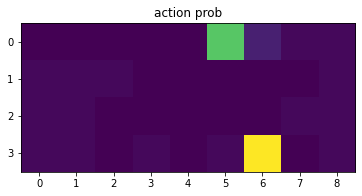

In [17]:
val_func = nnet_c
for b in b_l[-1:]:
    game.display(b)
#     tree = mcts.MCTS(game,val_func,mctsargs)
    tree = mcts.MCTS_color(game,val_func,mctsargs)
#     actprob=np.array(tree.getActionProb(b)).reshape(4,9)
    actprob = np.array(tree.getActionProb(b,int(b.sum()==0))).reshape(4,9)
    print(actprob)
    plt.figure()
    plt.imshow(actprob)
    plt.title('action prob')

In [36]:

from pickle import Pickler, Unpickler

ex_tournament = 9
ex_id = 'checkpoints_mcts100_cpuct2_id_res9-0'
ex_fn_part = 'checkpoint_0'

ex_dir = f'/scratch/zz737/fiar/tournaments/tournament_{ex_tournament}/{ex_id}'
ex_fn = f'{ex_fn_part}.pth.tar'
load_folder_file = (ex_dir, ex_fn)

modelFile = os.path.join(load_folder_file[0], load_folder_file[1])
examplesFile = modelFile + ".examples"
with open(examplesFile, "rb") as f:
    trainExamplesHistory = Unpickler(f).load()

In [164]:
reload(mcts)

tree3=mcts.MCTS(game,nnet3,mctsargs)
tree3.args.numMCTSSims=100
tree_c = mcts.MCTS_color(game,nnet_c,mctsargs)


In [165]:
# actprob=tree3.getActionProb(game.getInitBoard(),temp=1/10,dir_alpha=0.03,epsilon=0.25)
actprob=tree_c.getActionProb(game.getInitBoard(),0,temp=1/10,dir_alpha=0,epsilon=0.25)
actprob.reshape(4,9)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [166]:
self = tree_c
s = self.game.stringRepresentation(game.getInitBoard())
counts = [self.Nsa[(s, a)] if (s, a) in self.Nsa else 0 for a in range(self.game.getActionSize())]

In [168]:
counts = np.array(counts)
counts = counts **10
counts = counts / counts.sum()

In [169]:
counts

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [154]:
counts = [x ** (10.) for x in counts]
counts_sum = float(sum(counts))
probs = [x / counts_sum for x in counts]

In [158]:
probs

[1.592803553394743e-16,
 1.592803553394743e-16,
 1.592803553394743e-16,
 1.592803553394743e-16,
 1.592803553394743e-16,
 1.592803553394743e-16,
 1.6310308386762167e-13,
 1.592803553394743e-16,
 1.6310308386762167e-13,
 1.592803553394743e-16,
 1.592803553394743e-16,
 1.592803553394743e-16,
 4.131322207038102e-06,
 1.592803553394743e-16,
 9.631073999299192e-09,
 1.592803553394743e-16,
 1.592803553394743e-16,
 1.592803553394743e-16,
 1.592803553394743e-16,
 1.592803553394743e-16,
 1.592803553394743e-16,
 4.4992758035326475e-08,
 1.592803553394743e-16,
 0.9999958140440618,
 1.592803553394743e-16,
 1.592803553394743e-16,
 1.592803553394743e-16,
 1.592803553394743e-16,
 9.405345702440617e-12,
 1.6310308386762167e-13,
 1.592803553394743e-16,
 1.592803553394743e-16,
 1.592803553394743e-16,
 1.592803553394743e-16,
 1.592803553394743e-16,
 1.592803553394743e-16]

In [161]:
counts= counts ** 10
counts = counts/counts.sum()
counts

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'